## Installations and Imports

In [ ]:
!pip install ipython-autotime
%load_ext autotime

!pip install minisom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=d48e243d570d9f12465fba6a5da5352b7e8e6b598231ce91b42af6e398d841a2
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom
time: 21.1 s (started: 2024-04-23 07:30:52 +00:00)


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

time: 4.01 s (started: 2024-04-23 07:31:13 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 22.1 s (started: 2024-04-23 07:31:17 +00:00)


Import Google Sheet as a pandas dataframe

In [ ]:
id = '1C-CfBPjDKqY7efxzroeEXlVq9otzpeIa1oyJegywtR4'
gid = '1895042392'
url = f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv&id={id}&gid={gid}'

response = requests.get(url)

print(response)

csv_data = StringIO(response.text)

base_df = pd.read_csv(csv_data)

df = base_df

<Response [200]>
time: 2.25 s (started: 2024-04-23 09:10:51 +00:00)


In [ ]:
pd.set_option("display.max_rows", None)
base_df

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice
0,65cfa16636282e35aef6a70a,3,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,IWD,PIT,BIT
1,65b8a67e9168618ac5a50601,22,Ukraine,Pavlohradskyi raion,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT
2,65b2caeb9f9f640b8b5baa1a,15,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,PIT,BIT,IWD
3,65b2caf29f9f640b8b5baa1f,23,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT
4,65c348de7aaeca445328349c,26,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,BIT,PIT,IWD
5,65c24f1f9a572d03d9ab9dbc,25,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT
6,65bbb98748068df4246e0fc1,21,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT
7,65b53e6507d382fe681f2fa9,25,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT
8,65bfb1caf8b61b7999ef22f7,29,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,PIT,BIT,IWD
9,65b2d0289f9f640b8b5badf2,31,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,IWD,BIT,PIT


time: 42.1 ms (started: 2024-04-23 09:10:54 +00:00)


## Self Organizing Map

### Data Preprocessing

Remove unnecessary columns and convert data to numbers

In [ ]:
original_df = base_df.drop(columns=['ID', 'Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])
original_np = original_df.to_numpy()

print(original_np)

[[3 'Ukraine' 'IWD']
 [22 'Ukraine' 'IWD']
 [15 'Ukraine' 'PIT']
 [23 'Ukraine' 'IWD']
 [26 'Nepal' 'BIT']
 [25 'Nepal' 'IWD']
 [21 'Nepal' 'IWD']
 [25 'Nepal' 'IWD']
 [29 'Nigeria' 'PIT']
 [31 'Nigeria' 'IWD']
 [22 'someCoutry' 'IWD']
 [49 'Nigeria' 'IWD']
 [17 'Kazakhstan' 'IWD']
 [17 'Kazakhstan' 'BIT']
 [43 'Pakistan' 'IWD']
 [26 'Nigeria' 'BIT']
 [18 'Afghanistan' 'IWD']
 [19 'Uzbekistan' 'IWD']
 [22 'Nepal' 'IWD']
 [22 'Nepal' 'PIT']
 [22 'Nepal' 'IWD']
 [21 'Nepal' 'IWD']
 [21 'Ukraine' 'IWD']
 [33 'Nigeria' 'IWD']
 [23 'Nepal' 'IWD']
 [23 'Ukraine' 'IWD']
 [32 'Nigeria' 'IWD']
 [15 'Kazakhstan' 'IWD']
 [27 'Nigeria' 'IWD']
 [32 'Nigeria' 'IWD']
 [34 'Nigeria' 'IWD']
 [15 'Kazakhstan' 'IWD']
 [20 'Nepal' 'IWD']
 [34 'Nigeria' 'PIT']
 [4 'someCountry' 'PIT']
 [15 'Lithuania' 'IWD']
 [22 'Nepal' 'IWD']
 [24 'Turkey' 'IWD']
 [23 'Pakistan' 'IWD']
 [22 'Bangladesh' 'IWD']
 [31 'Poland' 'IWD']
 [28 'Nigeria' 'IWD']
 [18 'some Country' 'BIT']
 [2 'some Country' 'IWD']
 [25 'Nigeria' '

In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

label_encoder = LabelEncoder()

scaler = MinMaxScaler()

# def timezone_encoder(timezone_str):
#     parts = timezone_str.split(':')

#     hours = int(parts[0][-3:])
#     minutes = int(parts[1])

#     timezone = hours + minutes / 60.0

#     return timezone

for column in ['Age', 'Country', 'First Choice']:
  if column == 'Age':
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
  else:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

df

,ID,Age,Country,First Choice
0,65cfa16636282e35aef6a70a,0.021277,0.7500,0.333333
1,65b8a67e9168618ac5a50601,0.425532,0.7500,0.333333
2,65b2caeb9f9f640b8b5baa1a,0.276596,0.7500,0.666667
3,65b2caf29f9f640b8b5baa1f,0.446809,0.7500,0.333333
4,65c348de7aaeca445328349c,0.510638,0.3750,0.000000
5,65c24f1f9a572d03d9ab9dbc,0.489362,0.3750,0.333333
6,65bbb98748068df4246e0fc1,0.404255,0.3750,0.333333
7,65b53e6507d382fe681f2fa9,0.489362,0.3750,0.333333
8,65bfb1caf8b61b7999ef22f7,0.574468,0.4375,0.666667
9,65b2d0289f9f640b8b5badf2,0.617021,0.4375,0.333333


time: 61 ms (started: 2024-04-03 14:51:00 +00:00)


Create training dataset

In [ ]:
ids = df['ID']

train_df = df.drop(columns=["ID", "Country"])

train_data = train_df.to_numpy()

time: 3.71 ms (started: 2024-04-03 14:51:00 +00:00)


In [ ]:
truncated_train_data = np.around(train_data, decimals=2)

data_list = []

for i in range(len(train_data)):
    data_list.append([str(original_np[i]), str(train_data[i]), str(truncated_train_data[i])])

comparison_df = pd.DataFrame(data_list, columns=["Original Data", "Train Data", "Truncated Train Data"])

comparison_df

,Original Data,Train Data,Truncated Train Data
0,[3 'Ukraine' 'IWD'],[0.0212766 0.33333333],[0.02 0.33]
1,[22 'Ukraine' 'IWD'],[0.42553191 0.33333333],[0.43 0.33]
2,[15 'Ukraine' 'PIT'],[0.27659574 0.66666667],[0.28 0.67]
3,[23 'Ukraine' 'IWD'],[0.44680851 0.33333333],[0.45 0.33]
4,[26 'Nepal' 'BIT'],[0.5106383 0. ],[0.51 0. ]
5,[25 'Nepal' 'IWD'],[0.4893617 0.33333333],[0.49 0.33]
6,[21 'Nepal' 'IWD'],[0.40425532 0.33333333],[0.4 0.33]
7,[25 'Nepal' 'IWD'],[0.4893617 0.33333333],[0.49 0.33]
8,[29 'Nigeria' 'PIT'],[0.57446809 0.66666667],[0.57 0.67]
9,[31 'Nigeria' 'IWD'],[0.61702128 0.33333333],[0.62 0.33]


time: 64 ms (started: 2024-04-03 14:51:00 +00:00)


### Training

Setting hyper parameters

In [ ]:
x = 30
y = 30
input_len = train_data.shape[1]
sigma = .5
learning_rate = .5

time: 953 µs (started: 2024-04-03 14:51:01 +00:00)


Training the model

In [ ]:
som = MiniSom(x, y, input_len, sigma=sigma, learning_rate=learning_rate)
som.train_batch(train_data, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.054506767738893826
time: 81.8 ms (started: 2024-04-03 14:51:04 +00:00)


### Visualization and Evaluation

In [ ]:
u_matrix = som.distance_map().T

time: 67.1 ms (started: 2024-04-03 14:51:08 +00:00)


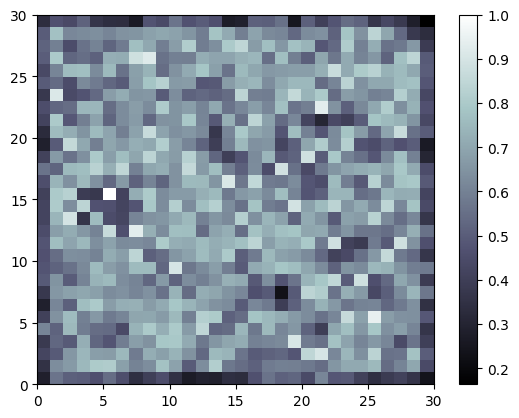

time: 1.19 s (started: 2024-04-03 14:51:10 +00:00)


In [ ]:
## Whiter means greater distance and darker means less distance
plt.pcolor(u_matrix, cmap='bone')
plt.colorbar()

### Hyperparameter Optimization

SOM dimensions optimization


*   x should be the sqrt of 5 times the sqrt of the number of rows
*   x and y should be equal



In [ ]:
x = int(np.sqrt(5 * np.sqrt(train_data.shape[0])))
y = int(np.sqrt(5 * np.sqrt(train_data.shape[0])))
input_len = train_data.shape[1]

time: 1.11 ms (started: 2024-04-03 14:51:15 +00:00)


Sigma and Learning Rate optimization using hyperopt library

In [ ]:
space = {
    'sig': hp.uniform("sig", 0.001, x / 2.01),
    "learning_rate": hp.uniform("learning_rate", 0.001, x / 2.01),
}

def som_fn(space):
  sig = space["sig"]
  learning_rate = space["learning_rate"]
  val = MiniSom(x, y, input_len, sigma=sig, learning_rate=learning_rate).quantization_error(train_data)
  print(val)
  return { 'loss': val, 'status': STATUS_OK }

trials = Trials()
best = fmin(
    fn=som_fn,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)
print(best)

for i, trials in enumerate(trials.trials[:2]):
  print(i, trials)

sigma = best["sig"]
learning_rate = best["learning_rate"]

0.3111366337746494
0.3141621040342991
0.3133791014663858
0.3144870621440091
0.3103048647809052
0.31519135287437
0.31541984423053754
0.3262078443855545
0.30850184092891675
0.310770057866839
0.3578407838708991
0.36610879397906254
0.3268772662859041
0.31417311662231934
0.34587356541257636
0.33482326506407634
0.366002007058797
0.35433789231538027
0.3758978214391564
0.4146654728454614
0.34162470729800454
0.3171067598536058
0.3224193398653915
0.3597622878832095
0.3245136312247133
0.33120881736003954
0.31082604017929283
0.3202021552066453
0.3233208223986835
0.3248498819700939
0.3072563127813909
0.3822265975714051
0.3362087984531012
0.3149210769529159
0.3155707959050487
0.32014029567801777
0.31725792538374475
0.31401036708941527
0.3167555694335544
0.3191953540774241
0.3110396214596317
0.3109437613406087
0.3210591152600288
0.35243731439207826
0.3204367962771957
0.31647296892283877
0.3145422819593041
0.3242921907438646
0.31346375949432786
0.3096792884201706
0.32176907873717725
0.3992805143167733

In [ ]:
som = MiniSom(x, y, input_len, sigma=sigma, learning_rate=learning_rate)
som.train_batch(train_data, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.06375344072759402
time: 16.7 ms (started: 2024-04-03 14:51:52 +00:00)


In [ ]:
u_matrix = som.distance_map().T

time: 3.14 ms (started: 2024-04-03 14:51:56 +00:00)


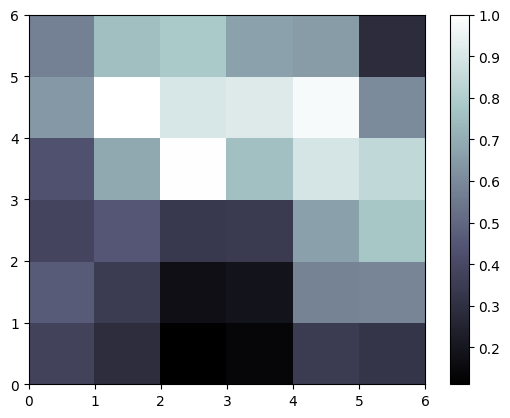

time: 550 ms (started: 2024-04-03 14:52:00 +00:00)


In [ ]:
## Whiter means greater distance and darker means less distance
plt.pcolor(u_matrix, cmap='bone')
plt.colorbar()

<ipython-input-19-4cb7493b77c7>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coordinates[:, 0], coordinates[:, 1], s=30, cmap='viridis')  # Adjust the size and colormap as needed


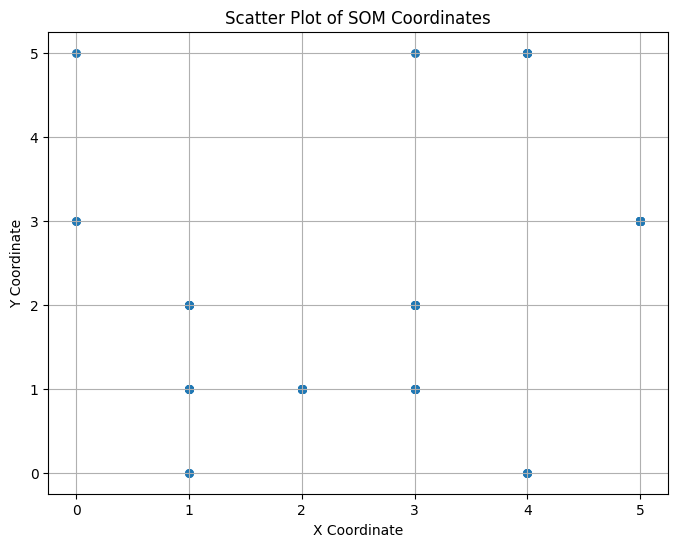

time: 273 ms (started: 2024-04-03 14:52:07 +00:00)


In [ ]:
# Basic Scatter Plot

mapped = som.win_map(train_data)

coordinates = np.array([som.winner(x) for x in train_data])

plt.figure(figsize=(8, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=30, cmap='viridis')  # Adjust the size and colormap as needed
plt.title('Scatter Plot of SOM Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

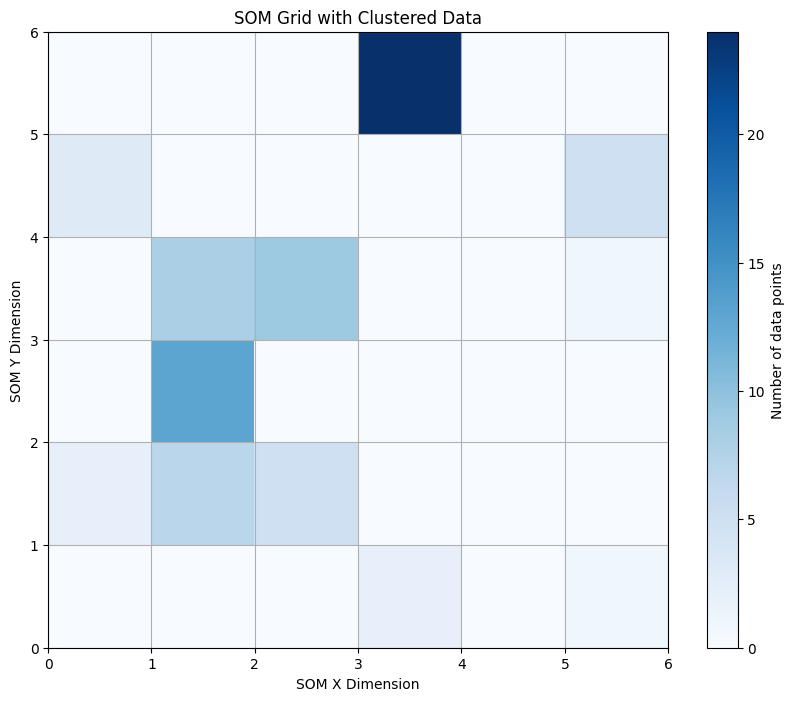

time: 379 ms (started: 2024-04-03 14:52:13 +00:00)


In [ ]:
# Plot based on cluster intensity

node_counts = np.zeros((x, y))

for i in range(x):
    for j in range(x):
        if (i, j) in mapped:
            node_counts[i, j] = len(mapped[(i, j)])
        else:
            node_counts[i, j] = 0

plt.figure(figsize=(10, 8))
plt.pcolor(node_counts, cmap='Blues')  # Adjust the colormap as needed
plt.colorbar(label='Number of data points')
plt.title('SOM Grid with Clustered Data')
plt.xlabel('SOM X Dimension')
plt.ylabel('SOM Y Dimension')
plt.grid(True)
plt.show()

In [ ]:
som_shape = (x, y)

time: 1.06 ms (started: 2024-04-03 14:52:18 +00:00)


Node (0, 3)
[[15 'Ukraine' 'PIT']
 [4 'someCountry' 'PIT']]
[[0.27659574 0.66666667]
 [0.04255319 0.66666667]]
Node (0, 5)
[[49 'Nigeria' 'IWD']]
[[1.         0.33333333]]
Node (1, 0)
[[3 'Ukraine' 'IWD']
 [2 'some Country' 'IWD']]
[[0.0212766  0.33333333]
 [0.         0.33333333]]
Node (1, 1)
[[17 'Kazakhstan' 'IWD']
 [18 'Afghanistan' 'IWD']
 [19 'Uzbekistan' 'IWD']
 [15 'Kazakhstan' 'IWD']
 [15 'Kazakhstan' 'IWD']
 [15 'Lithuania' 'IWD']
 [16 'Azerbaijan' 'IWD']]
[[0.31914894 0.33333333]
 [0.34042553 0.33333333]
 [0.36170213 0.33333333]
 [0.27659574 0.33333333]
 [0.27659574 0.33333333]
 [0.27659574 0.33333333]
 [0.29787234 0.33333333]]
Node (1, 2)
[[26 'Nepal' 'BIT']
 [17 'Kazakhstan' 'BIT']
 [26 'Nigeria' 'BIT']
 [18 'some Country' 'BIT']
 [23 'SomeCountry' 'BIT']]
[[0.5106383  0.        ]
 [0.31914894 0.        ]
 [0.5106383  0.        ]
 [0.34042553 0.        ]
 [0.44680851 0.        ]]
Node (2, 1)
[[22 'Ukraine' 'IWD']
 [21 'Nepal' 'IWD']
 [22 'someCoutry' 'IWD']
 [22 'Nepal' 'I

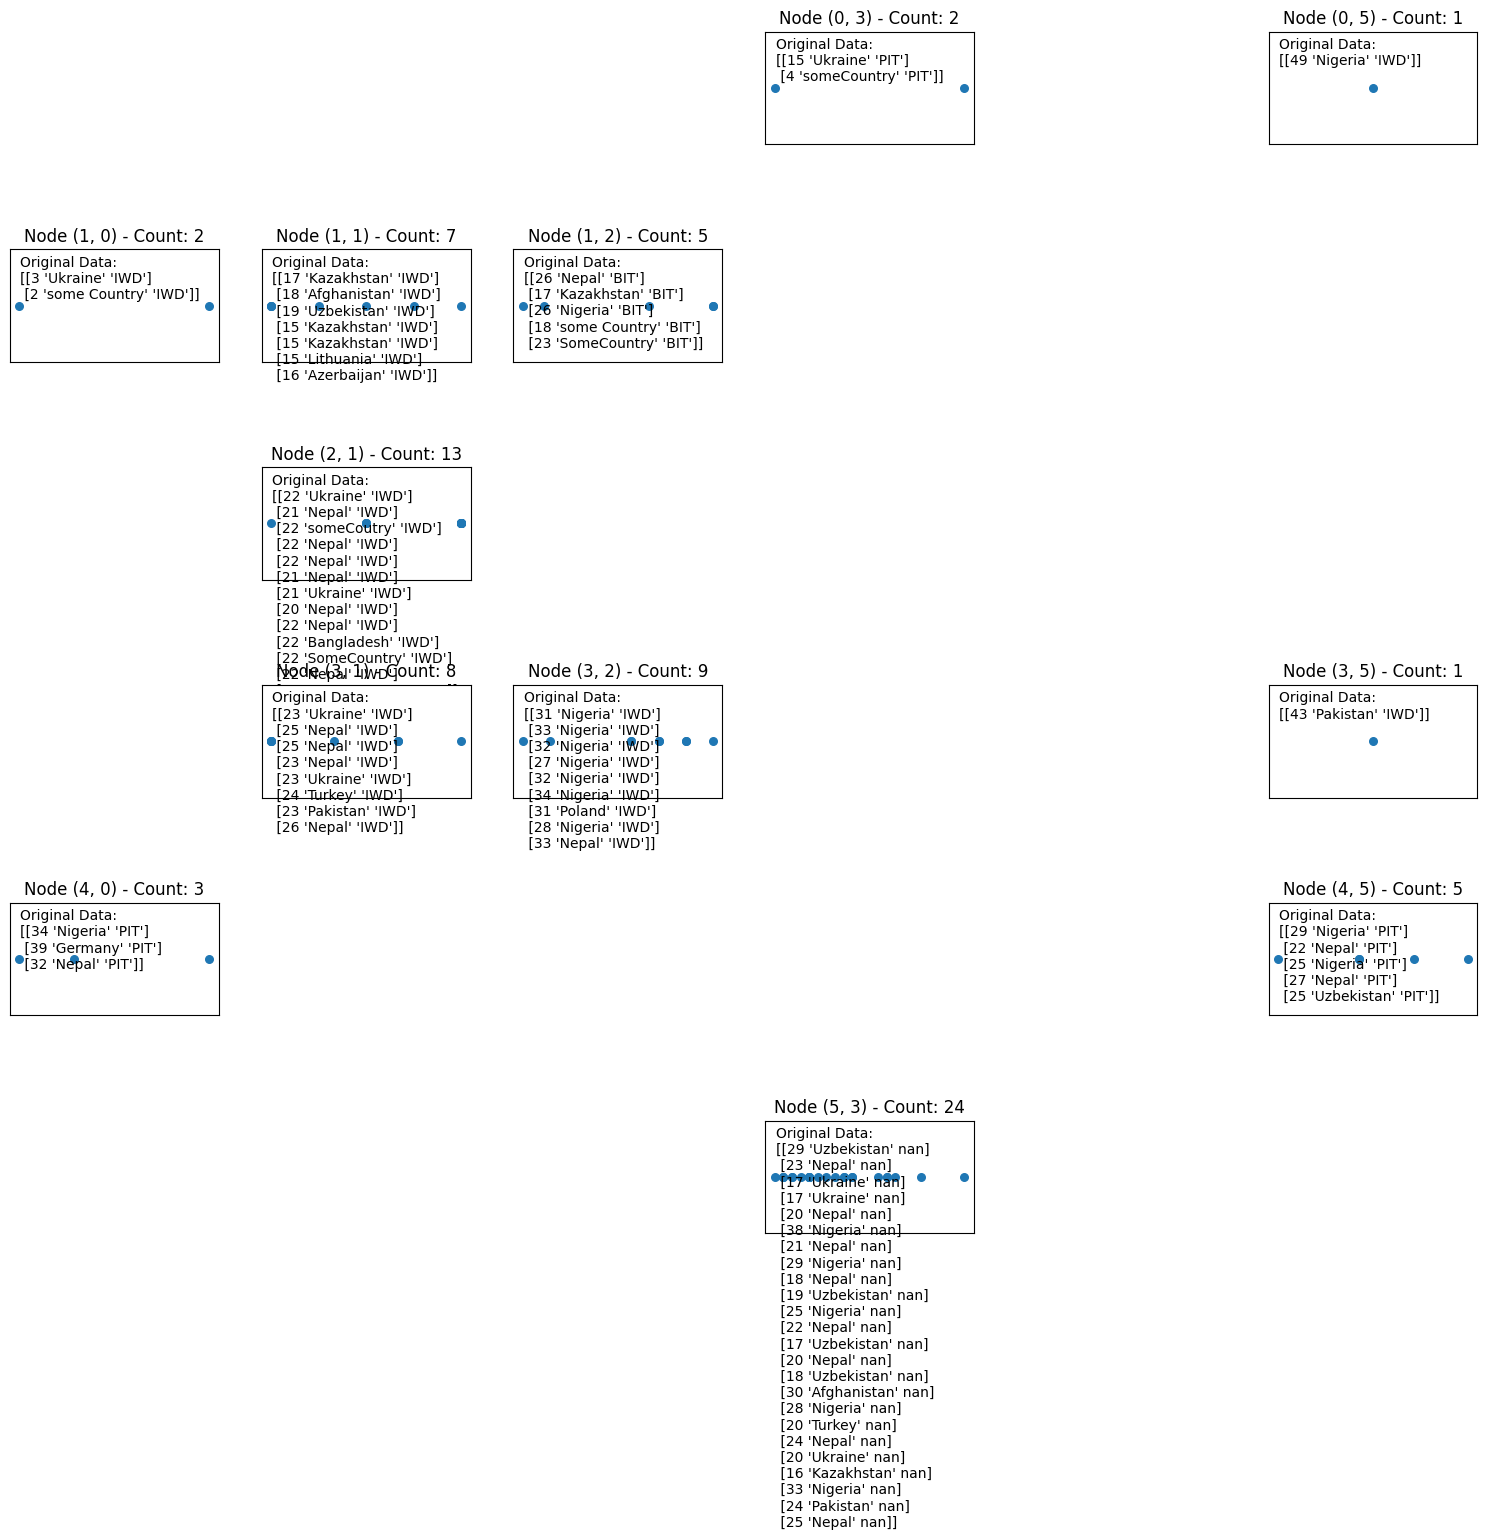

In [ ]:
# Plot with each node in the SOM and the input values and original values of the corresponding node

fig, axs = plt.subplots(som_shape[0], som_shape[1], figsize=(15, 15))

for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        if (i, j) in mapped:
            node_data = np.array(mapped[(i, j)])
            axs[i, j].scatter(node_data[:, 0], node_data[:, 1], s=30)
            axs[i, j].set_title(f'Node ({i}, {j}) - Count: {node_data.shape[0]}')
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

            original_node_data = []
            for idx, original_point in enumerate(original_np):
                if any(np.array_equal(train_data[idx], point) for point in node_data):
                    original_node_data.append(original_point)
            original_node_data = np.array(original_node_data)

            print(f"Node ({i}, {j})")
            print(original_node_data)
            print(node_data)
            print("=" * 30)
            axs[i, j].text(0.05, 0.95, f'Original Data:\n{original_node_data}', transform=axs[i, j].transAxes, verticalalignment='top')
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

## Agglomerative Clustering

### Data Preprocessing

In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

label_encoder = LabelEncoder()

scaler = MinMaxScaler()

# def timezone_encoder(timezone_str):
#     parts = timezone_str.split(':')

#     hours = int(parts[0][-3:])
#     minutes = int(parts[1])

#     timezone = hours + minutes / 60.0

#     return timezone

for column in ['Age', 'Country', 'First Choice']:
  if column == 'Age':
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
  else:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

df

,ID,Age,Country,First Choice,Cluster
0,65cfa16636282e35aef6a70a,0.021277,0.7500,0.333333,5
1,65b8a67e9168618ac5a50601,0.425532,0.7500,0.333333,0
2,65b2caeb9f9f640b8b5baa1a,0.276596,0.7500,0.666667,7
3,65b2caf29f9f640b8b5baa1f,0.446809,0.7500,0.333333,7
4,65c348de7aaeca445328349c,0.510638,0.3750,0.000000,3
5,65c24f1f9a572d03d9ab9dbc,0.489362,0.3750,0.333333,3
6,65bbb98748068df4246e0fc1,0.404255,0.3750,0.333333,0
7,65b53e6507d382fe681f2fa9,0.489362,0.3750,0.333333,3
8,65bfb1caf8b61b7999ef22f7,0.574468,0.4375,0.666667,2
9,65b2d0289f9f640b8b5badf2,0.617021,0.4375,0.333333,4


time: 39.2 ms (started: 2024-04-07 14:31:16 +00:00)


### Age and First Choice Clustering

In [ ]:
data = df[['Age', 'First Choice']].copy()

scaler = MinMaxScaler()
encoder = LabelEncoder()
data['FIRST_Choice_Encoded'] = encoder.fit_transform(data['First Choice'])
data.drop(columns=['First Choice'], inplace=True)
data_scaled = scaler.fit_transform(data)

num_clusters = 4

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agg_clustering.fit_predict(data_scaled)

base_df['Cluster'] = clusters

prev_age = base_df.groupby('Cluster')['Age'].mean().to_dict()
prev_count = base_df['Cluster'].value_counts().to_dict()


def clusters_within_target(cluster_sizes, target_size):
    return all(abs(size - target_size) <= 1 for size in cluster_sizes.values())

target_size = len(base_df) / len(base_df['Cluster'].unique())  # Target size for each cluster
iteration = 0

while True:
    cluster_sizes = base_df['Cluster'].value_counts()

    smallest_cluster_id = cluster_sizes.idxmin()

    smallest_cluster_count = min(cluster_sizes.values)

    smallest_cluster_mean_age = base_df[base_df['Cluster'] == smallest_cluster_id]['Age'].mean()

    bigger_clusters = cluster_sizes[cluster_sizes.values > smallest_cluster_count]
    nearest_bigger_cluster_id = None

    min_diff = float('inf')
    for cluster_id, size in bigger_clusters.items():
        cluster_mean_age = base_df[base_df['Cluster'] == cluster_id]['Age'].mean()
        if abs(cluster_mean_age - smallest_cluster_mean_age) < min_diff:
            min_diff = abs(cluster_mean_age - smallest_cluster_mean_age)
            nearest_bigger_cluster_id = cluster_id

    cluster_data = base_df[base_df['Cluster'] == nearest_bigger_cluster_id]
    for _, data_point in cluster_data.iterrows():
        if cluster_sizes[smallest_cluster_id] < target_size and cluster_sizes[nearest_bigger_cluster_id] > target_size:
            if abs(data_point['Age'] - smallest_cluster_mean_age) <= min_diff:
                base_df.at[data_point.name, 'Cluster'] = smallest_cluster_id
                break  # Exit the loop after reassigning one data point

    iteration += 1

    if clusters_within_target(base_df['Cluster'].value_counts().to_dict(), target_size) or iteration > 1000:
        break

after_age = base_df.groupby('Cluster')['Age'].mean().to_dict()
after_count = base_df['Cluster'].value_counts().to_dict()

time: 260 ms (started: 2024-04-07 14:32:32 +00:00)


In [ ]:
print(prev_age, prev_count)
print(after_age, after_count)

{0: 32.411764705882355, 1: 23.041666666666668, 2: 21.514285714285716, 3: 6.0} {2: 35, 1: 24, 0: 17, 3: 4}
{0: 32.526315789473685, 1: 22.333333333333332, 2: 22.904761904761905, 3: 16.473684210526315} {2: 21, 1: 21, 3: 19, 0: 19}
time: 835 µs (started: 2024-04-07 14:32:35 +00:00)


In [ ]:
base_df.sort_values(by="Cluster")

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice,Cluster
61,65c0a466b630ef20a800b7da,38,Nigeria,Abuja,GMT+01:00,FEB 16 WE 24,NaN,NaN,NaN,0
47,65b2cb079f9f640b8b5baa2f,25,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,PIT,IWD,BIT,0
48,65c44dc65c3ad285c078012f,39,Germany,Bonn,GMT+02:00,FEB 16 WE 24,PIT,IWD,BIT,0
40,65bf9c6c143ae6fe11f0938b,31,Poland,Poznan,GMT+02:00,FEB 16 WE 24,IWD,PIT,BIT,0
53,65c34a817aaeca44532834a0,32,Nepal,Mahadevsthan,GMT+05:45,FEB 16 WE 24,PIT,IWD,BIT,0
33,65bf4871b3689108a13df22f,34,Nigeria,Abuja,GMT+01:00,FEB 16 WE 24,PIT,IWD,BIT,0
55,65c386dca8dda2a7c7e6380b,33,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,0
30,65c2aeb82af36e87337c93f3,34,Nigeria,Abuja,GMT+01:00,FEB 16 WE 24,IWD,PIT,BIT,0
29,65bfad133479a21be050b055,32,Nigeria,Abuja,GMT+01:00,FEB 16 WE 24,IWD,BIT,PIT,0
56,65b2cb139f9f640b8b5baa37,29,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,NaN,NaN,NaN,0


time: 45.2 ms (started: 2024-04-07 14:32:36 +00:00)


### First Choice Clustering

In [ ]:
# # Loop through each cluster to create sub clusters based on FIRST Choice
# final = {}
# cluster_id_counter = 1

# for cluster_key, df in cluster_dfs.items():
#     # Get only choice data and label it from 0-3
#     cluster_dfs_2 = {}

#     data = df[['First Choice']].copy()
#     encoder = LabelEncoder()
#     data['FIRST_Choice_Encoded'] = encoder.fit_transform(data['First Choice'])
#     data.drop(columns=['First Choice'], inplace=True)
#     scaler = MinMaxScaler()
#     data_scaled = scaler.fit_transform(data)

#     # Cluster the data
#     num_clusters = 2
#     agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
#     clusters = agg_clustering.fit_predict(data_scaled)
#     df['Cluster'] = clusters + 1
#     df['Cluster'] += cluster_id_counter * 10

#     cluster_id_counter += 1

#     cluster_sizes = df['Cluster'].value_counts().sort_index()

#     # Iterate through the clusters to even out each of them
#     target_size = len(df) // num_clusters
#     iteration = 0
#     while any(abs(cluster_sizes - target_size) > 1):
#         for cluster_id, size in cluster_sizes.items():
#             if size > target_size + 1:
#                 sample_idx = df[df['Cluster'] == cluster_id].sample(n=1).index[0]
#                 nearest_smaller_cluster = (cluster_sizes[cluster_sizes < target_size] - target_size).idxmax()
#                 df.at[sample_idx, 'Cluster'] = nearest_smaller_cluster
#                 cluster_sizes[cluster_id] -= 1
#                 cluster_sizes[nearest_smaller_cluster] += 1
#         iteration += 1
#         if iteration > 1000:
#             break

#     for sub_cluster_key, sub_df in df.groupby('Cluster'):
#         cluster_dfs_2[f'{cluster_key}_{sub_cluster_key}'] = sub_df

#     print(cluster_dfs_2)

#     final.update(cluster_dfs_2)

{'Cluster_0_11':                           ID  Age      Country              City   Timezone  \
2   65b2caeb9f9f640b8b5baa1a   15      Ukraine              Kyiv  GMT+03:00   
18  65c348a57aaeca4453283498   22        Nepal          Lalitpur  GMT+05:45   
19  65b2caa19f9f640b8b5ba9e2   22        Nepal          Lalitpur  GMT+05:45   
21  65b8fa8a351871871f4de32c   21        Nepal         Kathmandu  GMT+05:45   
34  65cfa31c36282e35aef6a717    4  someCountry          someCity  GMT+03:00   
37  65bfa445ca1355fb1d73748b   24       Turkey          Istanbul  GMT+03:00   
52  65cfa28d36282e35aef6a713   22  SomeCountry          SomeCity  GMT+03:00   
57  65b4eaebdfb5b049c0c05a27   23        Nepal      Mahadevsthan  GMT+05:45   
59  65b2cb2c9f9f640b8b5baa4a   17      Ukraine              Kyiv  GMT+02:00   
60  65c463b838b45ddf1fcb8312   20        Nepal  Pokhara Lekhnath  GMT+05:45   
62  65b54ef4bfdf224c4cbbf2fc   21        Nepal          Lalitpur  GMT+05:45   
64  65b4635a7df648930b15b6aa   18  

### Export the clustered data as CSV

In [ ]:
csv_file_path = '/content/drive/MyDrive/Nobel/Automation Team/clustered_demo_data_agglomerative.csv'

base_df.to_csv(csv_file_path, index=False)

time: 230 ms (started: 2024-04-07 14:32:44 +00:00)


## K-means

### Data Preprocessing

In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

label_encoder = LabelEncoder()

scaler = MinMaxScaler()

# def timezone_encoder(timezone_str):
#     parts = timezone_str.split(':')

#     hours = int(parts[0][-3:])
#     minutes = int(parts[1])

#     timezone = hours + minutes / 60.0

#     return timezone

for column in ['Age', 'Country', 'First Choice']:
  if column == 'Age':
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
  else:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

df

,ID,Age,Country,First Choice
0,65cfa16636282e35aef6a70a,0.021277,0.7500,0.333333
1,65b8a67e9168618ac5a50601,0.425532,0.7500,0.333333
2,65b2caeb9f9f640b8b5baa1a,0.276596,0.7500,0.666667
3,65b2caf29f9f640b8b5baa1f,0.446809,0.7500,0.333333
4,65c348de7aaeca445328349c,0.510638,0.3750,0.000000
5,65c24f1f9a572d03d9ab9dbc,0.489362,0.3750,0.333333
6,65bbb98748068df4246e0fc1,0.404255,0.3750,0.333333
7,65b53e6507d382fe681f2fa9,0.489362,0.3750,0.333333
8,65bfb1caf8b61b7999ef22f7,0.574468,0.4375,0.666667
9,65b2d0289f9f640b8b5badf2,0.617021,0.4375,0.333333


time: 118 ms (started: 2024-04-07 16:45:35 +00:00)


In [ ]:
data = df[['Age', 'First Choice']].copy()
data_scaled = np.array(data)

time: 4.77 ms (started: 2024-04-12 08:48:11 +00:00)


### Clustering

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np

def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    uneven = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return uneven, clusters

uneven, clusters = get_even_clusters(data, 14)

time: 26.4 ms (started: 2024-04-12 10:45:57 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
base_df['Cluster'] = clusters
base_df['Uneven'] = uneven

time: 1.71 ms (started: 2024-04-07 16:50:55 +00:00)


In [ ]:
base_df.sort_values(by="Cluster")

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice,Cluster,Uneven
53,65c34a817aaeca44532834a0,32,Nepal,Mahadevsthan,GMT+05:45,FEB 16 WE 24,PIT,IWD,BIT,0,0
77,65b787753de94def9983d672,33,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,NaN,NaN,NaN,0,2
68,65b2cad09f9f640b8b5baa05,17,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,NaN,NaN,NaN,0,2
19,65b2caa19f9f640b8b5ba9e2,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,PIT,IWD,BIT,0,0
56,65b2cb139f9f640b8b5baa37,29,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,NaN,NaN,NaN,0,2
47,65b2cb079f9f640b8b5baa2f,25,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,PIT,IWD,BIT,0,0
45,65b858eb63459b1f269fb33c,27,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,PIT,IWD,BIT,0,0
8,65bfb1caf8b61b7999ef22f7,29,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,PIT,BIT,IWD,0,0
44,65bf6ac10e0f3f58ed44eecc,25,Nigeria,Abuja,GMT+01:00,FEB 16 WE 24,PIT,IWD,BIT,0,0
58,65b2cb1f9f9f640b8b5baa40,17,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,NaN,NaN,NaN,0,2


time: 64.2 ms (started: 2024-04-07 16:50:57 +00:00)


### Export

In [ ]:
base_df

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice,Cluster
0,65cfa16636282e35aef6a70a,3,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,IWD,PIT,BIT,5
1,65b8a67e9168618ac5a50601,22,Ukraine,Pavlohradskyi raion,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT,0
2,65b2caeb9f9f640b8b5baa1a,15,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,PIT,BIT,IWD,7
3,65b2caf29f9f640b8b5baa1f,23,Ukraine,Kyiv,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT,7
4,65c348de7aaeca445328349c,26,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,BIT,PIT,IWD,3
5,65c24f1f9a572d03d9ab9dbc,25,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,3
6,65bbb98748068df4246e0fc1,21,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,0
7,65b53e6507d382fe681f2fa9,25,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,3
8,65bfb1caf8b61b7999ef22f7,29,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,PIT,BIT,IWD,2
9,65b2d0289f9f640b8b5badf2,31,Nigeria,Lagos,GMT+01:00,FEB 16 WE 24,IWD,BIT,PIT,4


time: 219 ms (started: 2024-04-07 14:30:00 +00:00)


In [ ]:
csv_file_path = '/content/drive/MyDrive/Nobel/Automation Team/clustered_demo_data_k-means-6.csv'

base_df.to_csv(csv_file_path, index=False)

time: 19.6 ms (started: 2024-04-07 16:51:16 +00:00)


## Weighted K-means

### Data Preprocessing

In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

label_encoder = LabelEncoder()

scaler = MinMaxScaler()

# def timezone_encoder(timezone_str):
#     parts = timezone_str.split(':')

#     hours = int(parts[0][-3:])
#     minutes = int(parts[1])

#     timezone = hours + minutes / 60.0

#     return timezone

for column in ['Age', 'Country', 'First Choice']:
  if column == 'Age':
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
  else:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

df

,ID,Age,Country,First Choice
0,65cfa16636282e35aef6a70a,0.021277,0.7500,0.333333
1,65b8a67e9168618ac5a50601,0.425532,0.7500,0.333333
2,65b2caeb9f9f640b8b5baa1a,0.276596,0.7500,0.666667
3,65b2caf29f9f640b8b5baa1f,0.446809,0.7500,0.333333
4,65c348de7aaeca445328349c,0.510638,0.3750,0.000000
5,65c24f1f9a572d03d9ab9dbc,0.489362,0.3750,0.333333
6,65bbb98748068df4246e0fc1,0.404255,0.3750,0.333333
7,65b53e6507d382fe681f2fa9,0.489362,0.3750,0.333333
8,65bfb1caf8b61b7999ef22f7,0.574468,0.4375,0.666667
9,65b2d0289f9f640b8b5badf2,0.617021,0.4375,0.333333


time: 57.4 ms (started: 2024-04-12 08:41:19 +00:00)


In [ ]:
data = df[['Age', 'First Choice']].copy()
data_scaled = np.array(data)

weights = np.array([2, 1])
weighted_data = data_scaled * weights

weighted_data

array([[0.04255319, 0.33333333],
       [0.85106383, 0.33333333],
       [0.55319149, 0.66666667],
       [0.89361702, 0.33333333],
       [1.0212766 , 0.        ],
       [0.9787234 , 0.33333333],
       [0.80851064, 0.33333333],
       [0.9787234 , 0.33333333],
       [1.14893617, 0.66666667],
       [1.23404255, 0.33333333],
       [0.85106383, 0.33333333],
       [2.        , 0.33333333],
       [0.63829787, 0.33333333],
       [0.63829787, 0.        ],
       [1.74468085, 0.33333333],
       [1.0212766 , 0.        ],
       [0.68085106, 0.33333333],
       [0.72340426, 0.33333333],
       [0.85106383, 0.33333333],
       [0.85106383, 0.66666667],
       [0.85106383, 0.33333333],
       [0.80851064, 0.33333333],
       [0.80851064, 0.33333333],
       [1.31914894, 0.33333333],
       [0.89361702, 0.33333333],
       [0.89361702, 0.33333333],
       [1.27659574, 0.33333333],
       [0.55319149, 0.33333333],
       [1.06382979, 0.33333333],
       [1.27659574, 0.33333333],
       [1.

time: 35.1 ms (started: 2024-04-12 09:03:23 +00:00)


### Clustering

In [ ]:
def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    uneven = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return uneven, clusters

time: 1.12 ms (started: 2024-04-12 10:46:06 +00:00)


In [ ]:
uneven, clusters = get_even_clusters(weighted_data, 14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


time: 394 ms (started: 2024-04-12 09:05:30 +00:00)


In [ ]:
base_df['Cluster'] = clusters
base_df['Uneven'] = uneven

time: 3.61 ms (started: 2024-04-12 09:05:59 +00:00)


### Export

In [ ]:
base_df.sort_values(by="Cluster")

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice,Cluster,Uneven
39,65b66fc96571701abe4b422b,22,Bangladesh,Dhaka,GMT+06:00,FEB 16 WE 24,IWD,BIT,PIT,0,0
50,65b8ae719168618ac5a50604,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,0,0
36,65b2cada9f9f640b8b5baa0d,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,0,0
52,65cfa28d36282e35aef6a713,22,SomeCountry,SomeCity,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT,0,0
32,65bcf17c8b00e05faa69f9a5,20,Nepal,Karyabinayak,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,0,0
22,65b2cae99f9f640b8b5baa18,21,Ukraine,Kyiv,GMT+02:00,FEB 16 WE 24,IWD,BIT,PIT,0,0
21,65b8fa8a351871871f4de32c,21,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,0,0
46,65cfa2f936282e35aef6a716,22,SomeCountry,SomeCity,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT,0,0
18,65c348a57aaeca4453283498,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,0,0
17,65b2cb319f9f640b8b5baa4e,19,Uzbekistan,Tashkent,GMT+05:00,FEB 16 WE 24,IWD,BIT,PIT,0,0


time: 70.9 ms (started: 2024-04-12 09:06:01 +00:00)


In [ ]:
csv_file_path = '/content/drive/MyDrive/Nobel/Automation Team/clustered_demo_data_weighted-k-means-6.csv'

base_df.to_csv(csv_file_path, index=False)

time: 409 ms (started: 2024-04-12 09:10:00 +00:00)


## Dealing with Incomplete data (Weighted K means)

### Data Preprocessing

In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

df

,ID,Age,Country,First Choice
0,65cfa16636282e35aef6a70a,3,Ukraine,IWD
1,65b8a67e9168618ac5a50601,22,Ukraine,IWD
2,65b2caeb9f9f640b8b5baa1a,15,Ukraine,PIT
3,65b2caf29f9f640b8b5baa1f,23,Ukraine,IWD
4,65c348de7aaeca445328349c,26,Nepal,BIT
5,65c24f1f9a572d03d9ab9dbc,25,Nepal,IWD
6,65bbb98748068df4246e0fc1,21,Nepal,IWD
7,65b53e6507d382fe681f2fa9,25,Nepal,IWD
8,65bfb1caf8b61b7999ef22f7,29,Nigeria,PIT
9,65b2d0289f9f640b8b5badf2,31,Nigeria,IWD


time: 70.8 ms (started: 2024-04-23 09:11:30 +00:00)


In [ ]:
df = base_df.drop(columns=['Timezone', 'City', 'Cohort', 'Second Choice', 'Third Choice'])

choice_counts = df["First Choice"].value_counts()

average_count = choice_counts.mean()

choice_diff = average_count - choice_counts

sorted_choices = choice_diff.sort_values(ascending=False).index

df["Original Choice"] = df["First Choice"]
base_df["Original Choice"] = df["Original Choice"]

for index, row in df.iterrows():
    if pd.isna(row["First Choice"]):
        assigned = False
        for choice in sorted_choices:
            if choice_counts[choice] <= average_count:
                df.at[index, "First Choice"] = choice
                choice_counts[choice] += 1
                assigned = True
                break
        if not assigned:
            least_popular_choice = choice_counts.idxmin()
            df.at[index, "First Choice"] = least_popular_choice
            choice_counts[least_popular_choice] += 1

choice_counts = df["First Choice"].value_counts()

base_df["First Choice"] = df["First Choice"]

print(choice_counts)

df.sort_values(by="First Choice")

First Choice
IWD    41
PIT    20
BIT    19
Name: count, dtype: int64


,ID,Age,Country,First Choice,Original Choice
57,65b4eaebdfb5b049c0c05a27,23,Nepal,BIT,NaN
54,65cfa24036282e35aef6a711,23,SomeCountry,BIT,BIT
56,65b2cb139f9f640b8b5baa37,29,Uzbekistan,BIT,NaN
15,65c26d7de5d951f42f156972,26,Nigeria,BIT,BIT
58,65b2cb1f9f9f640b8b5baa40,17,Ukraine,BIT,NaN
13,65b2cae69f9f640b8b5baa16,17,Kazakhstan,BIT,BIT
59,65b2cb2c9f9f640b8b5baa4a,17,Ukraine,BIT,NaN
42,65be164996b6c821488de8fa,18,some Country,BIT,BIT
61,65c0a466b630ef20a800b7da,38,Nigeria,BIT,NaN
60,65c463b838b45ddf1fcb8312,20,Nepal,BIT,NaN


time: 46.1 ms (started: 2024-04-23 09:11:35 +00:00)


In [ ]:
label_encoder = LabelEncoder()

scaler = MinMaxScaler()

for column in ['Age', 'Country', 'First Choice']:
  if column == 'Age':
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
  else:
    df[column] = label_encoder.fit_transform(df[column])
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

df

,ID,Age,Country,First Choice,Original Choice
0,65cfa16636282e35aef6a70a,0.021277,0.7500,0.5,IWD
1,65b8a67e9168618ac5a50601,0.425532,0.7500,0.5,IWD
2,65b2caeb9f9f640b8b5baa1a,0.276596,0.7500,1.0,PIT
3,65b2caf29f9f640b8b5baa1f,0.446809,0.7500,0.5,IWD
4,65c348de7aaeca445328349c,0.510638,0.3750,0.0,BIT
5,65c24f1f9a572d03d9ab9dbc,0.489362,0.3750,0.5,IWD
6,65bbb98748068df4246e0fc1,0.404255,0.3750,0.5,IWD
7,65b53e6507d382fe681f2fa9,0.489362,0.3750,0.5,IWD
8,65bfb1caf8b61b7999ef22f7,0.574468,0.4375,1.0,PIT
9,65b2d0289f9f640b8b5badf2,0.617021,0.4375,0.5,IWD


time: 65.7 ms (started: 2024-04-23 09:11:41 +00:00)


In [ ]:
data = df[['Age', 'First Choice']].copy()
data_scaled = np.array(data)

weights = np.array([2, 1])
weighted_data = data_scaled * weights

weighted_data

array([[0.04255319, 0.5       ],
       [0.85106383, 0.5       ],
       [0.55319149, 1.        ],
       [0.89361702, 0.5       ],
       [1.0212766 , 0.        ],
       [0.9787234 , 0.5       ],
       [0.80851064, 0.5       ],
       [0.9787234 , 0.5       ],
       [1.14893617, 1.        ],
       [1.23404255, 0.5       ],
       [0.85106383, 0.5       ],
       [2.        , 0.5       ],
       [0.63829787, 0.5       ],
       [0.63829787, 0.        ],
       [1.74468085, 0.5       ],
       [1.0212766 , 0.        ],
       [0.68085106, 0.5       ],
       [0.72340426, 0.5       ],
       [0.85106383, 0.5       ],
       [0.85106383, 1.        ],
       [0.85106383, 0.5       ],
       [0.80851064, 0.5       ],
       [0.80851064, 0.5       ],
       [1.31914894, 0.5       ],
       [0.89361702, 0.5       ],
       [0.89361702, 0.5       ],
       [1.27659574, 0.5       ],
       [0.55319149, 0.5       ],
       [1.06382979, 0.5       ],
       [1.27659574, 0.5       ],
       [1.

time: 9.6 ms (started: 2024-04-23 09:11:44 +00:00)


### Clustering

In [ ]:
def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    uneven = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return uneven, clusters

time: 1.48 ms (started: 2024-04-23 09:11:47 +00:00)


In [ ]:
uneven, clusters = get_even_clusters(weighted_data, 14)

time: 43.1 ms (started: 2024-04-23 09:11:48 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
base_df['Cluster'] = clusters
base_df['Uneven'] = uneven

time: 2.99 ms (started: 2024-04-23 09:11:48 +00:00)


### Export

In [ ]:
base_df.sort_values(by="Cluster")

,ID,Age,Country,City,Timezone,Cohort,First Choice,Second Choice,Third Choice,Original Choice,Cluster,Uneven
39,65b66fc96571701abe4b422b,22,Bangladesh,Dhaka,GMT+06:00,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
36,65b2cada9f9f640b8b5baa0d,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
38,65c40814a5fee6e223d86f8b,23,Pakistan,Islamabad,GMT+05:00,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
22,65b2cae99f9f640b8b5baa18,21,Ukraine,Kyiv,GMT+02:00,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
21,65b8fa8a351871871f4de32c,21,Nepal,Kathmandu,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
20,65c4fd8dc47d464cef9b33e6,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,IWD,0,0
18,65c348a57aaeca4453283498,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,IWD,0,0
32,65bcf17c8b00e05faa69f9a5,20,Nepal,Karyabinayak,GMT+05:45,FEB 16 WE 24,IWD,PIT,BIT,IWD,0,0
50,65b8ae719168618ac5a50604,22,Nepal,Lalitpur,GMT+05:45,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0
10,65cfa1e336282e35aef6a70e,22,someCoutry,someCity,GMT+03:00,FEB 16 WE 24,IWD,BIT,PIT,IWD,0,0


time: 56.6 ms (started: 2024-04-23 09:11:51 +00:00)


In [ ]:
csv_file_path = '/content/drive/MyDrive/Nobel/Automation Team/clustered_demo_data_weighted-k-means-6-no-nan-choices.csv'

base_df.to_csv(csv_file_path, index=False)

time: 326 ms (started: 2024-04-23 09:12:37 +00:00)
